In [3]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

import pandas 

from lib import loading

df = loading.load_data()
print("We have {0} labelled examples.".format(len(df)))

Read the data file from ./airline-twitter-sentiment/Tweets.csv
We have 14640 labelled examples.


In [4]:
from lib import processing

training_data, testing_data = processing.process_data(df, sample_size=1)

Using a total of 14640 tweets
Training sample size: 13142
Testing sample size: 1498


In [5]:
from lib import classify
from nltk.sentiment import SentimentAnalyzer

sentim_analyzer = SentimentAnalyzer()
classify.add_features(training_data, sentim_analyzer)
train, test = classify.extract_features(training_data, testing_data, sentim_analyzer)

def evaluate_trainer(trainer):
    classifier, evaluation, _ = classify.train_model(train, test, sentim_analyzer, trainer)
    return {
        'classifier': classifier,
        'evaluation': evaluation,
        'trainer': trainer,
    }

Unigram features 1715
Bigram features:  1190


## Naive Bayes

In [6]:
from nltk.classify import SklearnClassifier
from sklearn.naive_bayes import BernoulliNB

evaluations = []
for alpha in np.arange(0, 2, 0.25): 
    trainer = {
        'name': 'Naive Bayes Classifier',
        'train': SklearnClassifier(BernoulliNB(
            fit_prior = True,
            alpha = alpha,
            )).train,
    }
    print("Training with alpha = ", alpha)
    evaluations.append(evaluate_trainer(trainer))



Training with alpha =  0.0
Training: Naive Bayes Classifier
Training classifier
Evaluating SklearnClassifier results...
Training with alpha =  0.25
Training: Naive Bayes Classifier
Training classifier
Evaluating SklearnClassifier results...
Training with alpha =  0.5
Training: Naive Bayes Classifier
Training classifier
Evaluating SklearnClassifier results...
Training with alpha =  0.75
Training: Naive Bayes Classifier
Training classifier
Evaluating SklearnClassifier results...
Training with alpha =  1.0
Training: Naive Bayes Classifier
Training classifier
Evaluating SklearnClassifier results...
Training with alpha =  1.25
Training: Naive Bayes Classifier
Training classifier
Evaluating SklearnClassifier results...
Training with alpha =  1.5
Training: Naive Bayes Classifier
Training classifier
Evaluating SklearnClassifier results...
Training with alpha =  1.75
Training: Naive Bayes Classifier
Training classifier
Evaluating SklearnClassifier results...


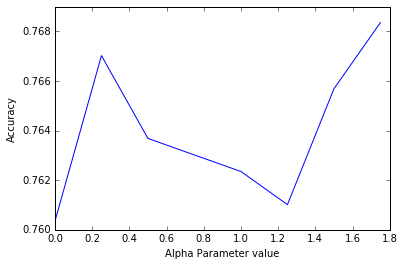

In [7]:
accuracies = [e['evaluation']['Accuracy'] for e in evaluations]
plt.plot(np.arange(0, 2, .25), accuracies)
plt.xlabel("Alpha Parameter value")
plt.ylabel("Accuracy")

### Dupa cum se poate observa, diferentele de precizie nu sunt considerabile.

# Concluzie

Pentru un clasificator de tipul Naive Bayes, **valoarea parameterului alpha nu influenteaza rezultatul intr-un mod semnificativ.**
